# Analysis of Differences in Text

The plan here is to

* analyze differences among types of text
    * word choice/usage via unique vocab, freqdist, lexical diversity, most common w and w/o stopwords, plotting
    * context via concordance, collocations, similar, common_contexts
* from these concepts, build a corpus of docs and explore differences in scholarly lit across disciplines
    * requires above plus pre-processing, tokenizing, etc.
    
### Running outline

1. Import gutenberg corpus - overview of other avaialble corpora and why might use them (lots of preprocessing!)
2. Corpus methods - sents, paras, etc.
3. Init a gutenberg text as Text
4. text module methods
5. do comparison of texts per above

In [2]:
import nltk
import numpy as np
import matplotlib

In [3]:
# NLTK data need to be downloaded separately. Uncomment and run the next line the first time this notebook is run
# on a new system.

# nltk.download() # use id 'all' to download all

In [4]:
from nltk.tokenize.stanford import StanfordTokenizer
from nltk import word_tokenize
from nltk.corpus import gutenberg, stopwords
from nltk import draw
from nltk.probability import *

Using examples from https://www.nltk.org/book/

```
Bird, Steven, Ewan Klein, and Edward Loper (2015). _Natural Language Processing with Python_. Accessed 2018-10-16 from https://www.nltk.org/book/.
```

In [5]:
# These are the texts in Gutenberg

print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [6]:
# some corpus methods
# https://www.nltk.org/api/nltk.corpus.reader
# gb is plaintext, so the available methods are defined at
# https://www.nltk.org/api/nltk.corpus.reader.html#module-nltk.corpus.reader.plaintext

gutenberg.sents('melville-moby_dick.txt') # a list of lists - do raw, then words first

[['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']'], ['ETYMOLOGY', '.'], ...]

In [7]:
# with plaintext, options are words, sents, paras, raw

gutenberg.words('melville-moby_dick.txt') # list of words and punctuation

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [8]:
gutenberg.paras('melville-moby_dick.txt') # lists of lists of lists

[[['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']']], [['ETYMOLOGY', '.']], ...]

In [9]:
# gutenberg.raw('melville-moby_dick.txt')

In [10]:
# more info on corpuse package at https://www.nltk.org/api/nltk.corpus.html
# Text module provides some analysis methods - need to make doc text and instance of nltk.Text

moby = nltk.Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))

In [11]:
# OR
# so creating as instance of Text object gives us access to different methods, in our case to explore context
# see text Module at https://www.nltk.org/api/nltk.html

from nltk.text import Text

moby = Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
moby.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [12]:
moby.dispersion_plot(['man', 'whale', 'God'])

/usr/local/lib/python3.6/dist-packages/nltk/draw/__init__.py:14: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded "


<Figure size 640x480 with 1 Axes>

In [13]:
moby.concordance('chowder')

Displaying 9 of 9 matches:
of walruses and whales . CHAPTER 15 Chowder . It was quite late in the evening 
t before us . But when that smoking chowder came in , the mystery was delightfu
e fishing food before him , and the chowder being surpassingly excellent , we d
vor , and in good time a fine cod - chowder was placed before us . We resumed b
t ' s that stultifying saying about chowder - headed people ? " But look , Quee
here were always boiling chowders . Chowder for breakfast , and chowder for din
wders . Chowder for breakfast , and chowder for dinner , and chowder for supper
fast , and chowder for dinner , and chowder for supper , till you began to look
p it for you till morning . But the chowder ; clam or cod to - morrow for break


In [14]:
moby.common_contexts(['man', 'whale'])

a_, old_, a_. white_-- the_' a_like one_, the_that the_- the_now
no_can a_in the_, the_in the_to a_' a_to a_that the_. a_as


In [15]:
from nltk.text import *

In [16]:
ci = ContextIndex(moby)

In [17]:
ci.common_contexts(['man', 'whale', 'God'])

FreqDist({('the', '-'): 3, (',', ','): 3, ('great', ','): 3, ('of', "'"): 3, ('the', 'of'): 3, (',', '!'): 3, ('o', '!'): 3})

In [18]:
ci.similar_words('man')

['then',
 'sir',
 'too',
 'whale',
 'which',
 'ship',
 'who',
 'now',
 'indeed',
 'sea',
 'Queequeg',
 'and',
 'perhaps',
 'Ahab',
 'sort',
 'boat',
 'gentlemen',
 'men',
 'Mr',
 'aye']

In [19]:
ci.word_similarity_dict('whale')

{'[': 0,
 'Moby': 0.003780718336483932,
 'Dick': 0.003816793893129771,
 'by': 0.005653710247349823,
 'Herman': 0,
 'Melville': 0,
 '1851': 0,
 ']': 0,
 'ETYMOLOGY': 0,
 '.': 0.0006075334143377885,
 '(': 0,
 'Supplied': 0,
 'a': 0.0009017132551848512,
 'Late': 0,
 'Consumptive': 0,
 'Usher': 0,
 'to': 0.002846975088967971,
 'Grammar': 0,
 'School': 0,
 ')': 0,
 'The': 0,
 'pale': 0.007905138339920948,
 '--': 0.001304631441617743,
 'threadbare': 0,
 'in': 0.0011357183418512207,
 'coat': 0.019417475728155338,
 ',': 0.0010224948875255625,
 'heart': 0.05,
 'body': 0.06944444444444443,
 'and': 0.00099626400996264,
 'brain': 0.03461538461538462,
 ';': 0.000980392156862745,
 'I': 0.005672149744753261,
 'see': 0.002976190476190476,
 'him': 0.003249390739236393,
 'now': 0.009652509652509652,
 'He': 0,
 'was': 0.00580046403712297,
 'ever': 0.009077155824508321,
 'dusting': 0,
 'his': 0.0015594541910331384,
 'old': 0.004790419161676647,
 'lexicons': 0,
 'grammars': 0.004081632653061225,
 'with': 0

In [20]:
cci = ConcordanceIndex(moby)

In [21]:
cci.offsets('whale')

[108,
 362,
 1063,
 1135,
 1180,
 1207,
 1240,
 1291,
 1492,
 1645,
 1820,
 1848,
 1867,
 1895,
 1940,
 2006,
 2129,
 2196,
 2238,
 2301,
 2324,
 2508,
 2563,
 2672,
 2738,
 2779,
 2792,
 2990,
 3106,
 3138,
 3265,
 3349,
 3379,
 3398,
 3667,
 3742,
 3891,
 4032,
 4175,
 4209,
 4244,
 4663,
 7080,
 7114,
 7283,
 7527,
 9490,
 9682,
 9878,
 9897,
 10831,
 13445,
 19211,
 19353,
 22336,
 22427,
 24061,
 24554,
 25184,
 25329,
 25751,
 25829,
 25872,
 31044,
 31645,
 31842,
 35526,
 35752,
 36561,
 36567,
 36655,
 36817,
 37423,
 40335,
 41035,
 44897,
 44936,
 44989,
 45051,
 45059,
 46532,
 50101,
 51931,
 52881,
 52912,
 52985,
 53026,
 53410,
 53478,
 53657,
 53805,
 53812,
 53850,
 53878,
 53924,
 53991,
 54074,
 54222,
 54239,
 54284,
 54535,
 55395,
 55501,
 56435,
 56489,
 57046,
 57961,
 57984,
 59361,
 61753,
 62963,
 63104,
 63223,
 63279,
 63361,
 63473,
 63513,
 63533,
 63540,
 63555,
 63611,
 63630,
 63663,
 63704,
 63711,
 63731,
 63771,
 63788,
 63826,
 64163,
 64358,
 643

In [22]:
cci.print_concordance('whale')

Displaying 25 of 25 matches:
s , and to teach them by what name a whale - fish is to be called in our tongue
least , take the higgledy - piggledy whale statements , however authentic , in 
 dreadful gulf of this monster ' s ( whale ' s ) mouth , are immediately lost a
 patient Job ." -- RABELAIS . " This whale ' s liver was two cartloads ." -- ST
 Touching that monstrous bulk of the whale or ork we have received nothing cert
 of oil will be extracted out of one whale ." -- IBID . " HISTORY OF LIFE AND D
ise ." -- KING HENRY . " Very like a whale ." -- HAMLET . " Which to secure , n
restless paine , Like as the wounded whale to shore flies thro ' the maine ." -
t had been a sprat in the mouth of a whale ." -- PILGRIM ' S PROGRESS . " That 
EN ' S ANNUS MIRABILIS . " While the whale is floating at the stern of the ship
 in - the - Whale . ... Some say the whale can ' t open his mouth , but that is
 masts to see whether they can see a whale , for the first discoverer has a duc
 for his pa

In [23]:
moby.count('whale')

906

In [24]:
# Vocab is a freqdist - some shortcuts (so do a fd on plaintext above)

moby.vocab().most_common()

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624),
 ('The', 612),
 ('their', 612),
 ('are', 586),
 ('they', 586),
 ('an', 582),
 ('some', 578),
 ('then', 571),
 ('my', 564),
 ('when', 553),
 ('upon', 538),
 ('out', 529),
 ('into', 520),
 ('man', 508),
 ('ship', 507),
 ('up', 505),
 ('mor

In [25]:
len(moby.vocab())

19317

In [26]:
len(moby)

260819

In [27]:
len(set(moby)) # so vocab is uniques

19317

In [28]:
# maybe a roundabout way to remove stopwords for the FD

from nltk.corpus import stopwords

In [29]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']


In [30]:
esw = stopwords.words('english')

In [31]:
esw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
# Text object doesn't provide a list of word, so we need either the tokens from one of the indexes 
# or we can go back to the source file

# we need to lowercase everything, too

nsw = [w.lower() for w in ci.tokens() if w.lower() not in esw and w.isalpha()]

In [33]:
len(gutenberg.words('melville-moby_dick.txt'))

260819

In [34]:
len(nsw)

110459

In [35]:
fd1 = FreqDist(gutenberg.words('melville-moby_dick.txt'))

In [36]:
fd2 = FreqDist(nsw)

In [37]:
fd1.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

In [38]:
fd2.most_common(20)

[('whale', 1226),
 ('one', 921),
 ('like', 647),
 ('upon', 566),
 ('man', 527),
 ('ship', 518),
 ('ahab', 511),
 ('ye', 472),
 ('sea', 455),
 ('old', 450),
 ('would', 432),
 ('though', 384),
 ('head', 345),
 ('yet', 345),
 ('boat', 336),
 ('time', 334),
 ('long', 333),
 ('captain', 329),
 ('still', 312),
 ('great', 306)]

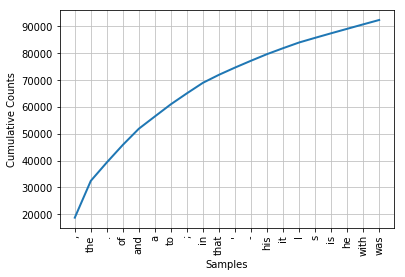

In [39]:
fd1.plot(20, cumulative = True)

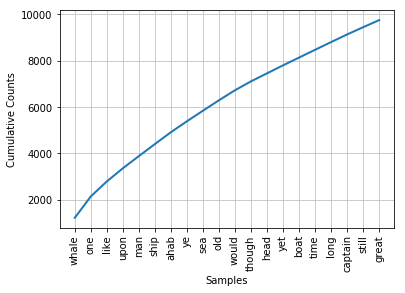

In [40]:
fd2.plot(20, cumulative = True)

In [41]:
# So what can we do with this?

# Hard to compare texts in the provided PG corpus - different genres, time periods, etc.

# Use requests to access ED and WW complete-ish from PG onine

import requests

In [75]:
r = requests.get('https://www.gutenberg.org/files/12242/12242.txt')
emily = r.text
with open('poetry/emily_dickinson_raw.txt', 'w', encoding='latin-1') as e:
    e.write(emily)
    e.close()

In [76]:
r = requests.get('https://www.gutenberg.org/files/1322/1322.txt')
walt = r.text
with open('poetry/walt_whitman_raw.txt', 'w', encoding='latin-1') as w:
    w.write(walt)
    w.close()

In [77]:
len(emily)

208189

In [78]:
len(walt)

775645

In [79]:
# these raw texts are not very nice - right now each one is one long string

emily

'Project Gutenberg\'s Poems: Three Series, Complete, by Emily Dickinson\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n\r\nTitle: Poems: Three Series, Complete\r\n\r\nAuthor: Emily Dickinson\r\n\r\nRelease Date: May 3, 2004 [EBook #12242]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: ASCII\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK POEMS: THREE SERIES, COMPLETE ***\r\n\r\n\r\n\r\n\r\nProduced by Jim Tinsley <jtinsley@pobox.com>\r\n\r\n\r\n\r\n\r\n\r\nPOEMS\r\n\r\nby EMILY DICKINSON\r\n\r\n\r\n\r\n\r\nEdited by two of her friends\r\n\r\nMABEL LOOMIS TODD and T.W. HIGGINSON\r\n\r\n\r\n\r\n\r\nPREFACE.\r\n\r\nThe verses of Emily Dickinson belong emphatically to what Emerson\r\nlong since called "the Poetry of the Portfolio,"--something produced\r\nabso

In [80]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [81]:
am_poets = PlaintextCorpusReader('poetry/', '.*') # note we are not including the raw files

In [82]:
# we now have a corpus and can use the plaintext corpus methods above

am_poets.fileids()

['emily_dickinson_edit.txt',
 'emily_dickinson_raw.txt',
 'walt_whitman_edit.txt',
 'walt_whitman_raw.txt']

In [83]:
wf = 'walt_whitman_edit.txt'
walt = am_poets.words(wf)

In [84]:
ef = 'emily_dickinson_edit.txt'
emily = am_poets.words(ef)

In [85]:
len(am_poets.raw(ef))

170552

In [86]:
len(am_poets.words(ef))

37177

In [87]:
len(am_poets.sents(ef))

2491

In [88]:
len(am_poets.paras(ef))

1981

In [89]:
len(am_poets.raw(wf))

738220

In [90]:
len(am_poets.words(wf))

154486

In [91]:
len(am_poets.sents(wf))

4258

In [97]:
len(am_poets.paras(wf))

2485

In [99]:
am_poets.raw(ef)

'Title: Poems: Three Series, Complete\n\nAuthor: Emily Dickinson\n\nRelease Date: May 3, 2004 [EBook #12242]\n\nLanguage: English\n\nCharacter set encoding: ASCII\n\nI. LIFE.\n\n\nI.\n\nSUCCESS.\n\n[Published in "A Masque of Poets"\nat the request of "H.H.," the author\'s\nfellow-townswoman and friend.]\n\nSuccess is counted sweetest\nBy those who ne\'er succeed.\nTo comprehend a nectar\nRequires sorest need.\n\nNot one of all the purple host\nWho took the flag to-day\nCan tell the definition,\nSo clear, of victory,\n\nAs he, defeated, dying,\nOn whose forbidden ear\nThe distant strains of triumph\nBreak, agonized and clear!\n\n\n\n\n\nII.\n\nOur share of night to bear,\nOur share of morning,\nOur blank in bliss to fill,\nOur blank in scorning.\n\nHere a star, and there a star,\nSome lose their way.\nHere a mist, and there a mist,\nAfterwards -- day!\n\n\n\n\n\nIII.\n\nROUGE ET NOIR.\n\nSoul, wilt thou toss again?\nBy just such a hazard\nHundreds have lost, indeed,\nBut tens have won a

In [100]:
am_poets.raw(wf)

'Title: Leaves of Grass\n\nAuthor: Walt Whitman\n\nPosting Date: August 24, 2008 [EBook #1322]\nRelease Date: May, 1998\n\nLanguage: English\n\nCharacter set encoding: ASCII\n\nLEAVES OF GRASS\n\nBy Walt Whitman\n\n\n\n     Come, said my soul,\n     Such verses for my Body let us write, (for we are one,)\n     That should I after return,\n     Or, long, long hence, in other spheres,\n     There to some group of mates the chants resuming,\n     (Tallying Earth\'s soil, trees, winds, tumultuous waves,)\n     Ever with pleas\'d smile I may keep on,\n     Ever and ever yet the verses owning--as, first, I here and now\n     Signing for Soul and Body, set to them my name,\n\n     Walt Whitman\n\n\n\n\n\nBOOK I.  INSCRIPTIONS\n\n\n\n\nOne\'s-Self I Sing\n\n  One\'s-self I sing, a simple separate person,\n  Yet utter the word Democratic, the word En-Masse.\n\n  Of physiology from top to toe I sing,\n  Not physiognomy alone nor brain alone is worthy for the Muse, I say\n      the Form complete 

In [114]:
am_poets.paras(wf)[10] # paras are stanzas - 10 is first poem

[['One', "'", 's', '-', 'Self', 'I', 'Sing']]

In [115]:
am_poets.paras(ef)[6] # paras are stanzas - 6 is first poem

[['I', '.']]

In [117]:
am_poets.sents(wf)[10:15] # first sentence is 10

[['One', "'", 's', '-', 'Self', 'I', 'Sing'],
 ['One',
  "'",
  's',
  '-',
  'self',
  'I',
  'sing',
  ',',
  'a',
  'simple',
  'separate',
  'person',
  ',',
  'Yet',
  'utter',
  'the',
  'word',
  'Democratic',
  ',',
  'the',
  'word',
  'En',
  '-',
  'Masse',
  '.'],
 ['Of',
  'physiology',
  'from',
  'top',
  'to',
  'toe',
  'I',
  'sing',
  ',',
  'Not',
  'physiognomy',
  'alone',
  'nor',
  'brain',
  'alone',
  'is',
  'worthy',
  'for',
  'the',
  'Muse',
  ',',
  'I',
  'say',
  'the',
  'Form',
  'complete',
  'is',
  'worthier',
  'far',
  ',',
  'The',
  'Female',
  'equally',
  'with',
  'the',
  'Male',
  'I',
  'sing',
  '.'],
 ['Of',
  'Life',
  'immense',
  'in',
  'passion',
  ',',
  'pulse',
  ',',
  'and',
  'power',
  ',',
  'Cheerful',
  ',',
  'for',
  'freest',
  'action',
  'form',
  "'",
  'd',
  'under',
  'the',
  'laws',
  'divine',
  ',',
  'The',
  'Modern',
  'Man',
  'I',
  'sing',
  '.'],
 ['As', 'I', 'Ponder', "'", 'd', 'in', 'Silence']]

In [119]:
am_poets.sents(ef)[8] # first sentence is 8

['SUCCESS', '.']

In [127]:
# keeping in mind that line breaks in poetry may be more important than sentence length
# we can analyze sentence and para/stanza lengths

# average sentence length
wlen = len(am_poets.sents(wf)) - 1
elen = len(am_poets.sents(ef)) - 1

In [130]:
# slice sentence lists to only include poetry

w_sents = am_poets.sents(wf)[10:wlen]
e_sents = am_poets.sents(ef)[8:elen]

In [137]:
w_wc = 0
for s in w_sents:
    w_wc += len(s)
print(w_wc / len(w_sents))

36.33976924888157


In [138]:
e_wc = 0
for s in e_sents:
    e_wc += len(s)
print(e_wc / len(e_sents))

14.961724415793714


In [133]:
# same calculation for para/stanza length

wplen = len(am_poets.paras(wf)) - 1
eplen = len(am_poets.paras(ef)) - 1

w_paras = am_poets.paras(wf)[10:wplen]
e_paras = am_poets.paras(ef)[6:eplen]

In [139]:
# we already have the word counts from sentence length analysis

print(w_wc / len(w_paras))

62.38278092158448


In [140]:
print(e_wc / len(e_paras))

18.81205673758865


In [141]:
# fdist = FreqDist(len(w) for w in text1)

# fdist of sentence lengths

ws_fdist = FreqDist(len(s) for s in w_sents)

In [142]:
es_fdist = FreqDist(len(s) for s in e_sents)

In [145]:
print(ws_fdist)

<FreqDist with 244 samples and 4247 outcomes>


In [146]:
len(w_sents)

4247

In [147]:
len(e_sents)

2482

In [148]:
print(es_fdist)

<FreqDist with 59 samples and 2482 outcomes>


In [149]:
ws_fdist.most_common(20)

[(3, 226),
 (5, 214),
 (6, 200),
 (7, 166),
 (2, 156),
 (4, 153),
 (8, 151),
 (12, 119),
 (9, 118),
 (11, 103),
 (10, 94),
 (13, 87),
 (14, 75),
 (15, 71),
 (17, 65),
 (16, 62),
 (20, 59),
 (23, 56),
 (25, 55),
 (19, 55)]

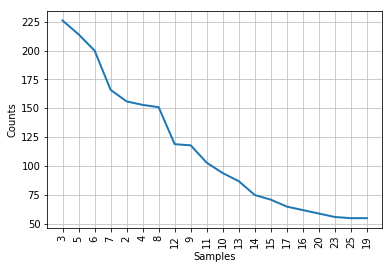

In [162]:
ws_fdist.plot(20)

In [153]:
es_fdist.most_common(20)

[(2, 598),
 (24, 123),
 (3, 117),
 (25, 98),
 (22, 92),
 (26, 90),
 (21, 88),
 (27, 78),
 (23, 76),
 (20, 70),
 (28, 62),
 (5, 60),
 (19, 57),
 (12, 55),
 (4, 53),
 (29, 53),
 (18, 51),
 (6, 51),
 (16, 49),
 (14, 46)]

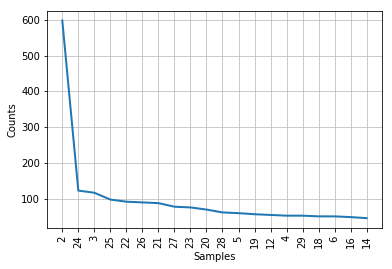

In [163]:
es_fdist.plot(20)

In [176]:
# fdist of stanza lengths (in sentences not words)
# remember paras are lists of lists

# fdist = FreqDist(len(w) for w in text1)

wp_fdist = FreqDist(len(p) for p in w_paras)
ep_fdist = FreqDist(len(p) for p in e_paras)

In [177]:
print(wp_fdist)

<FreqDist with 21 samples and 2474 outcomes>


In [178]:
len(w_paras)

2474

In [179]:
print(ep_fdist)

<FreqDist with 8 samples and 1974 outcomes>


In [180]:
print(len(e_paras))

1974


In [181]:
wp_fdist.most_common(20)

[(1, 1796),
 (2, 338),
 (3, 139),
 (4, 78),
 (5, 41),
 (6, 26),
 (8, 10),
 (7, 10),
 (10, 10),
 (9, 6),
 (14, 4),
 (12, 3),
 (11, 3),
 (23, 2),
 (13, 2),
 (45, 1),
 (20, 1),
 (56, 1),
 (17, 1),
 (28, 1)]

In [182]:
ep_fdist.most_common(20)

[(1, 1647), (2, 218), (3, 66), (4, 26), (5, 9), (6, 6), (7, 1), (8, 1)]

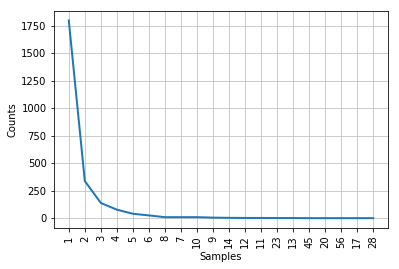

In [183]:
wp_fdist.plot(20)

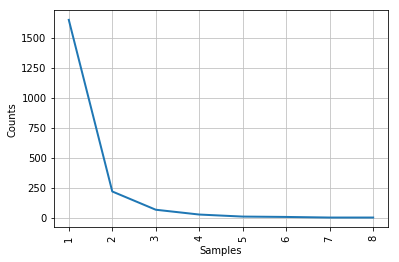

In [184]:
ep_fdist.plot()

In [187]:
# fdist of stanzas by number of words?
# fdist = FreqDist(len(w) for w in text1)
wpb = []
for p in w_paras:
    pwc = 0
    for s in p:
        pwc += len(s)
    wpb.append(pwc)
wwps = FreqDist(wpb)

In [188]:
print(wwps)

<FreqDist with 274 samples and 2474 outcomes>


In [189]:
wwps.most_common(20)

[(3, 68),
 (6, 61),
 (5, 60),
 (4, 53),
 (2, 50),
 (29, 49),
 (25, 43),
 (34, 43),
 (40, 42),
 (1, 41),
 (24, 41),
 (39, 40),
 (37, 39),
 (35, 39),
 (36, 39),
 (30, 38),
 (38, 38),
 (41, 37),
 (7, 35),
 (43, 35)]

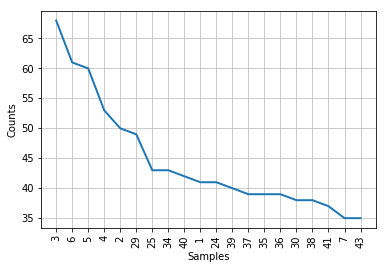

In [190]:
wwps.plot(20)

In [191]:
epb = []
for p in e_paras:
    pwc = 0
    for s in p:
        pwc += len(s)
    epb.append(pwc)
ewps = FreqDist(epb)

In [193]:
print(ewps)

<FreqDist with 86 samples and 1974 outcomes>


In [194]:
ewps.most_common(20)

[(2, 557),
 (24, 122),
 (26, 106),
 (25, 98),
 (3, 95),
 (27, 90),
 (22, 85),
 (23, 84),
 (21, 74),
 (29, 66),
 (28, 60),
 (20, 60),
 (19, 44),
 (30, 41),
 (4, 35),
 (31, 30),
 (18, 28),
 (32, 20),
 (5, 19),
 (17, 19)]

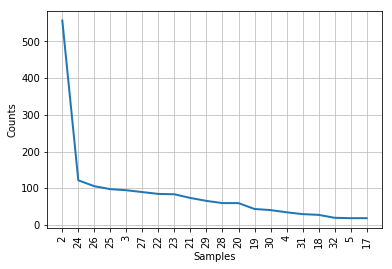

In [195]:
ewps.plot(20)